In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
face_file = '/content/drive/MyDrive/CPE270/haarcascade_frontalface_default.xml'
eye_file = '/content/drive/MyDrive/CPE270/haarcascade_eye.xml'
frontal_face = cv2.CascadeClassifier(face_file)
eye_detector = cv2.CascadeClassifier(eye_file)
img = cv2.imread("/content/drive/MyDrive/CPE270/face.png")
img = cv2.resize(img, (1000,800))
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#แปลงภาพเป็นภาพขาวดำ (grayscale) เพื่อใช้ในการตรวจจับฟีเจอร์
faces_result = frontal_face.detectMultiScale(gray_img)
#ใช้ Haar cascade สำหรับตรวจจับใบหน้าในภาพ grayscale และเก็บผลลัพธ์ลงในตัวแปร faces_result
for (x,y,w,h) in faces_result:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    #วาดกรอบเขียวรอบใบหน้า
roi_gray = gray_img[y:y+h, x:x+w]
roi_color = img[y:y+h, x:x+w]
#สกัดข้อมูลใบหน้า (Region of Interest) จากภาพ grayscale
#และภาพสีเขียวออกมาเก็บไว้ใน roi_gray และ roi_color ตามลำดับ
eyes = eye_detector.detectMultiScale(roi_gray)
#ตรวจจับตาในบริเวณใบหน้าที่สกัดข้อมูลแล้ว และเก็บผลลัพธ์ลงในตัวแปร eyes
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    #วาดกรอบสีเขียวบนรอบดวงตาที่ตรวจพบบนภาพroi_color

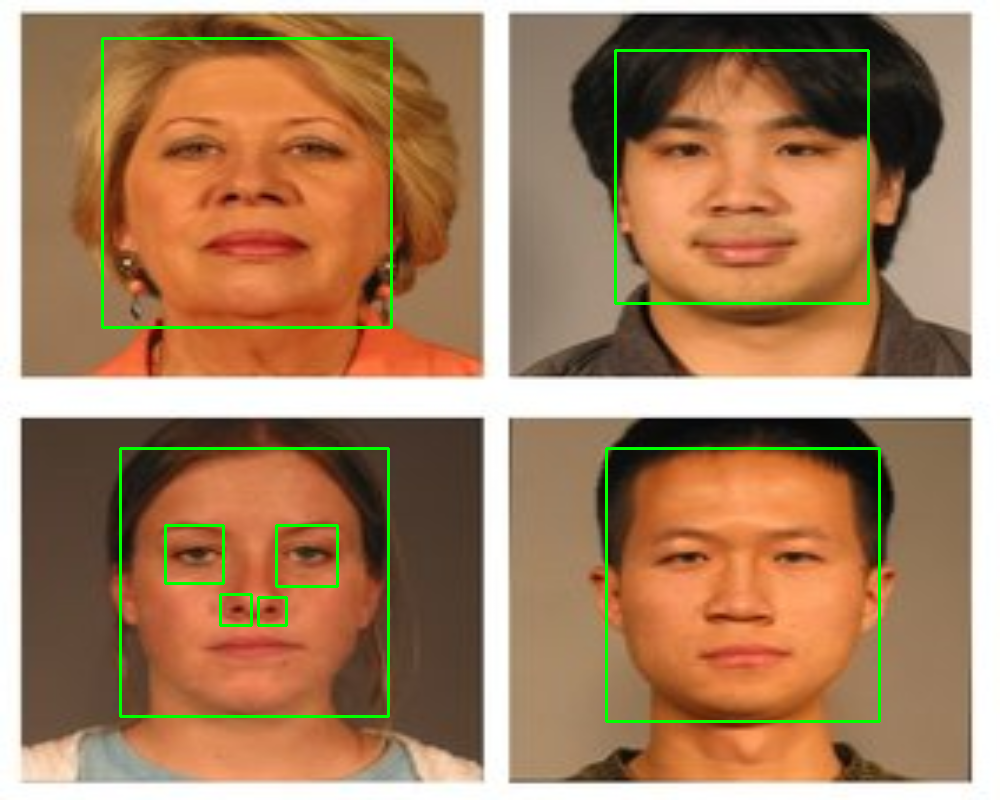

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
#ใช้ฟังก์ชันcv2_imshowเพื่อแสดงภาพที่อยู่ในตัวแปรimgในโน้ตบุ๊กColabโดยimgคือภาพที่ต้องการแสดง.
cv2.waitKey(0)
#การรอให้ผู้ใช้กดปุ่มใดๆเพื่อปิดหน้าต่างที่แสดงภาพ.
cv2.destroyAllWindows()
#ปิดหน้าต่างที่แสดงภาพทั้งหมดที่เปิดโดย OpenCV